In [1]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2024-01-02 07:10:12--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.207, 74.125.135.207, 172.253.117.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   207MB/s    in 0.3s    

2024-01-02 07:10:13 (207 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
!unzip '/content/cats_and_dogs_filtered.zip'

Archive:  /content/cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/

In [3]:
# 인풋 데이터 = (224,224,3)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tlf
from tensorflow import keras

In [5]:

# train, validation 데이터를 저장할 디렉토리 생성
train_dir = '/content/cats_and_dogs_filtered/train'
val_dir = '/content/cats_and_dogs_filtered/validation'



In [6]:
test_dir = ''

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
# ImageDataGenerator를 사용하여 데이터 증강 및 전처리
train_datagen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

val_datagen = ImageDataGenerator(rescale=1/255.)

# train 및 validation 데이터셋 생성
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=True
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
# from keras import layers

# model = keras.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
#     layers.MaxPooling2D(2, 2),
#     layers.Dropout(0.2),

#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D(2, 2),
#     layers.Dropout(0.2),

#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.MaxPooling2D(2, 2),

#     layers.Conv2D(256, (3, 3), activation='relu'),
#     layers.MaxPooling2D(2, 2),

#     layers.Flatten(),
#     layers.Dense(512, activation='relu'),
#     layers.Dense(2, activation='softmax')
# ])
from keras import layers
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (224,224,3)),
    layers.MaxPooling2D(2,2),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Conv2D(64,(3,3),activation = 'relu',input_shape = (224,224,3)),
    layers.MaxPooling2D(2,2),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Conv2D(128,(3,3),activation = 'relu',input_shape = (224,224,3)),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(2,activation='softmax')
])

In [25]:
from tensorflow.keras.optimizers import Adam

In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
)


Epoch 1/15
125/125 [==============================] - 33s 245ms/step - loss: 1.9319 - accuracy: 0.5585 - val_loss: 0.7420 - val_accuracy: 0.5210
Epoch 2/15
125/125 [==============================] - 31s 248ms/step - loss: 0.8543 - accuracy: 0.5620 - val_loss: 0.6606 - val_accuracy: 0.5980
Epoch 3/15
125/125 [==============================] - 30s 242ms/step - loss: 0.6984 - accuracy: 0.5950 - val_loss: 0.6324 - val_accuracy: 0.6440
Epoch 4/15
125/125 [==============================] - 37s 295ms/step - loss: 0.6821 - accuracy: 0.6025 - val_loss: 0.6299 - val_accuracy: 0.6280
Epoch 5/15
125/125 [==============================] - 30s 243ms/step - loss: 0.6430 - accuracy: 0.6365 - val_loss: 0.6437 - val_accuracy: 0.6320
Epoch 6/15
125/125 [==============================] - 31s 250ms/step - loss: 0.6543 - accuracy: 0.6160 - val_loss: 0.6137 - val_accuracy: 0.6490
Epoch 7/15
125/125 [==============================] - 31s 247ms/step - loss: 0.6467 - accuracy: 0.6085 - val_loss: 0.6264 - val_ac

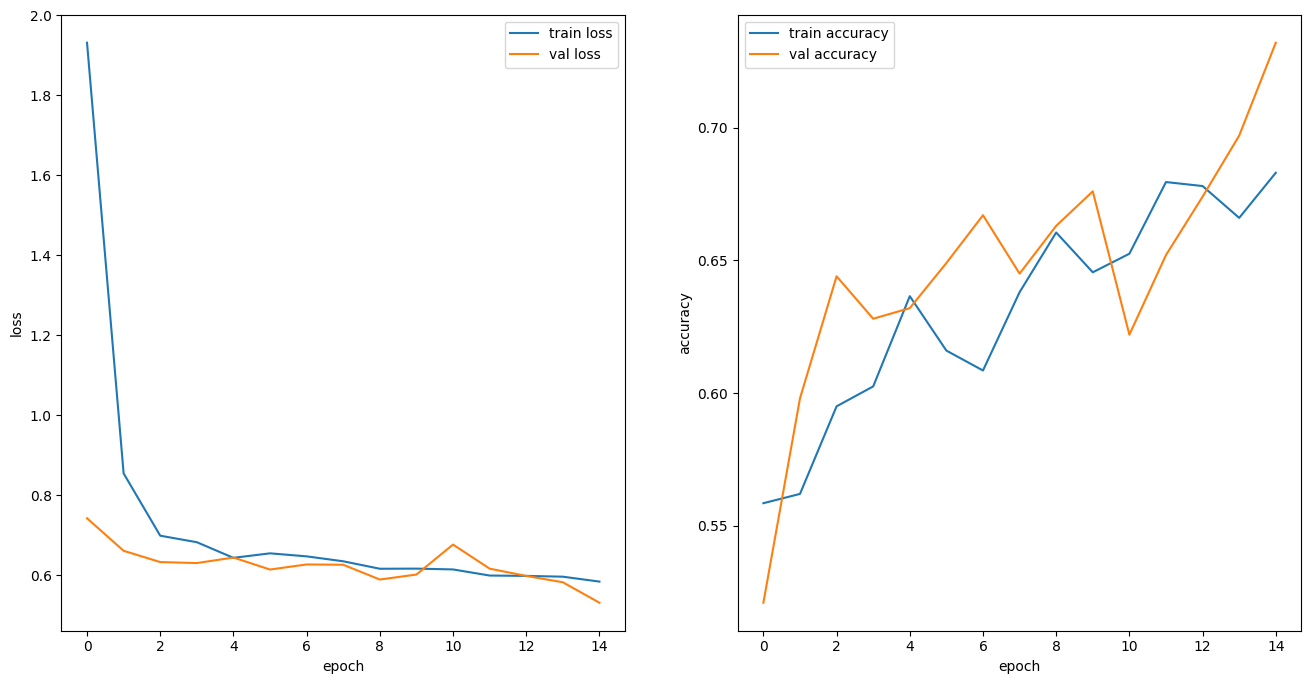

In [28]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1,2,1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.legend()
    plt.show()

plot_history(history)

In [29]:
model.save('1_cats_vs_dogs.keras')

In [30]:
loaded_model = keras.models.load_model('1_cats_vs_dogs.keras')
loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 111, 111, 32)      128       
 Normalization)                                                  
                                                                 
 dropout_9 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 54, 54, 64)       

In [ ]:
test_gen = ImageDataGenerator(rescale=1/255.)

In [ ]:
test_generator = test_gen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

In [ ]:
test_hist = loaded_model.evaluate(test_generator)